# Exercise

In this exercise we will do some signal processing on a large database of ECG waveforms.

## Setup

Install the following packages:

`MAT`

`DistributedArrays`

`PyPlot`

`Pkg.clone("git@github.com:andreasnoack/TSVD.jl.git")` or

`Pkg.clone("https://github.com/andreasnoack/TSVD.jl.git")`

In [5]:
addprocs(1)

1-element Array{Int64,1}:
 2

In [2]:
@everywhere using MAT

In [7]:
@everywhere using TSVD

In [8]:
@everywhere using DistributedArrays

In [9]:
# a couple extra definitions to patch into Base

@everywhere function Base.hcat{T<:DistributedArrays.DVector}(x::Vector{T})
    l    = length(x)
    if l == 0
        throw(ArgumentError("cannot flatten empty vector"))
    else
        x1   = x[1]
        m, n = size(x1, 1), size(x1, 2)
        B    = DArray((m, l*n)) do I
            B_local = Array(eltype(x1), map(length, I))
            for j = 1:length(I[2])
                B_local[:, j] = x[I[2][j]][I[1]]
            end
            return B_local
        end
        return B
    end
end

@everywhere Base.procs(A::Array) = fill(myid(), 1, 1)

## Loading files

In [10]:
path = "."

"."

In [11]:
dirs = @fetchfrom 2 filter(isdir, map(t -> joinpath(path, t), readdir(path)))

7-element Array{String,1}:
 "./.julia"
 "./s00124"
 "./s00177"
 "./s00283"
 "./s00308"
 "./s00377"
 "./s00408"

In [14]:
fls = @fetchfrom 2 filter(x->endswith(x,".mat"),mapreduce(t -> map(s -> joinpath(t, s), readdir(t)), vcat, dirs))

315-element Array{String,1}:
 "./s00124/3255538_0001.mat"
 "./s00124/3255538_0002.mat"
 "./s00124/3255538_0003.mat"
 "./s00124/3255538_0004.mat"
 "./s00124/3255538_0005.mat"
 "./s00124/3255538_0006.mat"
 "./s00124/3526846_0001.mat"
 "./s00124/3526846_0002.mat"
 "./s00124/3526846_0003.mat"
 "./s00124/3526846_0004.mat"
 "./s00124/3526846_0005.mat"
 "./s00124/3526846_0006.mat"
 "./s00124/3526846_0007.mat"
 ⋮                          
 "./s00408/3083502_0028.mat"
 "./s00408/3083502_0029.mat"
 "./s00408/3083502_0030.mat"
 "./s00408/3985400_0001.mat"
 "./s00408/3985400_0002.mat"
 "./s00408/3985400_0003.mat"
 "./s00408/3985400_0004.mat"
 "./s00408/3985400_0005.mat"
 "./s00408/3985400_0006.mat"
 "./s00408/3985400_0007.mat"
 "./s00408/3985400_0008.mat"
 "./s00408/3985400_0009.mat"

In [15]:
x = @fetchfrom 2 MAT.matread(fls[1])

Dict{String,Any} with 3 entries:
  "A"      => Dict{String,Any}(Pair{String,Any}("A",…
  "tm"     => [0.0; 0.008; … ; 2759.98; 2759.99]
  "signal" => [0.8; 0.44; … ; 1.56; 0.6]

In [17]:
using PyPlot

INFO: Precompiling module PyPlot.


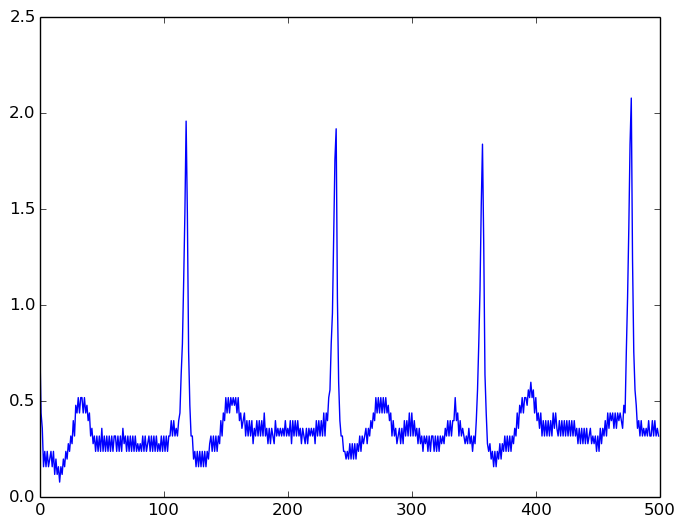

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fe48425cb10>

In [19]:
plot(x["signal"][1:500])

In [ ]:
# each file contains a dictionary; we want the "signal" key
dt = # use `matread` to read all of the files

## Forming a matrix

In [ ]:
# this converts a vector to size `n` by cutting down or repeating
@everywhere pad(v,n) = collect(take(cycle(v),n))

In [ ]:
# replace NaNs with zero
@everywhere denan!(v) = map!(x->isnan(x) ? zero(x) : x, v)

In [ ]:
function makemat(A::DArray, n)
    # this function should take a DArray of vectors, pad them to size `n`, denan
    # and place them as the columns of a distributed matrix
end

In [ ]:
A = makemat(dataset, 1000)

In [ ]:
B = # use `mapslices` to FFT each column

In [ ]:
v0 = DArray(I -> rand(Complex128, length(I[1])), (size(B, 1),), B.pids[:,1])
@time U, s, V = TSVD.tsvd(B, 5, initVec = v0, stepSize = 5);

In [ ]:
using PyPlot

In [ ]:
plot(convert(Array,abs(U)))